## TIGER simple analysy scripts - "Excercise for the Python In Lab course"

My PHD is focused around the development and characterization of the readout electronic for a high energy physics experiment located in China (BESIII).
The aim of this exam project is to test the possible use of the "pandas" library in the analysis of the data incoming from the chips.
"TIGER" is the name of the chips mounted on the detector, while the "GEMROCs" are FPGA-based modules which collect the data from the chips and send them to the PC.
A very basic (and ugly) Python script, written by me while leargning Python way before this course, manages the electronics configuration and the data acquisition.

The code, some sample data and this notebook can be downloaded from:
https://github.com/bortalberto/python_exam
This notebook is only a demonstrative summary of the code. The code explanation can be found as comments in the code itself.

In [7]:
from lib import elaboration #This class contains the calls to the other 2 classis

Let's create 2 instances with the data in the data folder. Change the path with the path to your data location.
There are 2 different modes (Trigger Less and Trigger Matched), in the data acquisition. They are very different, but for the objectives of this exercise we only need to know that they have a different data format and that the TL mode is used mostly for tests.
This part of the execution for the TL mode can take several minutes the first time it's run (the data are quite big and each hit needs to be related with another data to search in the data list). The pandas' dataframe is created at the end of the process and it will be automatically load since the next time.

In [8]:
TL_run_10 = elaboration.Run("./data/RUN_10","TL")

In [9]:
TM_run_11 = elaboration.Run("./data/RUN_11","TM")

The program also loads the configuration off the overall system and store it in a nested dictionary. In order to do that I also created the necessary save function in my main code:

In [10]:
#I left this block in "Code" mode only for legibility, this will of coarse do nothing here.
def save_conf_registers(self,save_txt=False, save_pickle=True):
    """
    Save configuration registers during acquisition start
    """
    conf_dict_total = {}
    for number, GEMROC in self.GEMROC_reading_dict.items():
        conf_dict_total[number] = {}
        conf_dict_total[number]["DAQ"] = GEMROC.GEM_COM.gemroc_DAQ_XX.DAQ_config_dict
        for T in range(0, 8):
            conf_dict_total[number]["TIGER {}".format(T)] = {}
            conf_dict_total[number]["TIGER {}".format(T)]["Global"] = GEMROC.g_inst.Global_cfg_list[T]
            for ch in range(0, 64):
                conf_dict_total[number]["TIGER {}".format(T)]["Ch {}".format(ch)] = {}
                conf_dict_total[number]["TIGER {}".format(T)]["Ch {}".format(ch)] = GEMROC.c_inst.Channel_cfg_list[T][ch]
    if save_txt:
        with open (self.conffile,'a+') as f:
            f.write(json.dumps(conf_dict_total))
    if save_pickle:
        with open (self.conffile+".pkl",'a+') as f:
            pickle.dump(conf_dict_total,f)

In [11]:
TL_run_10.measure_efficiency(0) 
#This function measure the efficency using the data in the dataframe and the configuration loaded in the dictionary

Efficiency with 1 TPs: 1.0
Efficiency with 2 TPs: 1.0
Efficiency with 3 TPs: 1.0


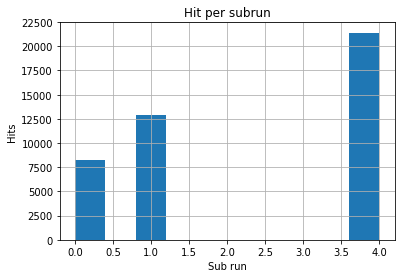

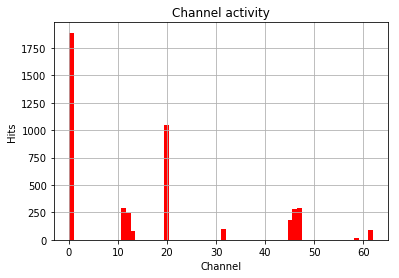

In [12]:
TL_run_10.plot_sub_runs_rates()
TM_run_11.plot_channel_activity()
#2 sample plottic functions

In the end, the handling of the pandas dataframe for complex operations involving the inter-data relations was too slow. To handle such data we will use something else (probably ROOT or PyROOT). 